![Machine Learning for Scientists in a hurry](https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/Title_ML.png?raw=1)

# Boilerplate

In [1]:
!if [ ! -f helpers.py ]; then wget "https://raw.githubusercontent.com/romerogroup/Notebooks_4SIAH/main/Machine_Learning/helpers.py"; fi

In [2]:
# import some custom helper code
import helpers
from helpers import set_css_in_cell_output
get_ipython().events.register('pre_run_cell', set_css_in_cell_output)

In [3]:
!pip install watermark

In [4]:
%%html
<div style="clear: both; display: table;" class="div-1">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 2. The Iris Classification Problem</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco<br>Aldo Humberto Romero</h2>
  <br>
  <img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/1-line%20logotype124-295.png?raw=1" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/SCPython.png?raw=1" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

<div style="clear: both; display: table;" class="div-1">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 2. The Iris Classification Problem</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco<br>Aldo Humberto Romero</h2>
  <br>
  <img src="./fig/1-line%20logotype124-295.png" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="./fig/SCPython.png" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

## Setup

In [5]:
%load_ext watermark

In [6]:
%watermark

Last updated: 2023-10-24T10:03:09.641390-04:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.14.0

Compiler    : Clang 11.0.3 (clang-1103.0.32.62)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [7]:
import time
start = time.time()
chapter_number = 2
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import sklearn

In [9]:
%watermark -iv

numpy     : 1.25.2
matplotlib: 3.8.0
sklearn   : 1.3.0



# Table of Contents

  1. [The Anderson's Iris Dataset](#iris)
      1. [Data representation](#representation)
      1. [Classification (Logistic Regression)](#classification_logistic)
      1. [Classification (K-nearest neighbors)](#classification_knn)
      1. [Classification (Support Vector Machines)](#classification_svm)
      1. [Classification (Perceptrons)](#classification_perceptrons)
      1. [Dimensionality Reduction (PCA)](#pca)
      1. [Other small datasets](#other_datasets)
  1. [Handwritten Digits Data Set](#digits)
      1. [The small 8x8 dataset](#dataset)
      1. [Gaussian Naive Bayes Estimator](#naive_bayes)
      1. [Model Validation](#model_validation)

<a id="iris"></a>
# The Anderson's Iris Dataset

The *Iris flower data set* or **Fisher's Iris dataset** or  **Anderson's Iris Dataset** is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*.

It is also called *Anderson's Iris data set* because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula

To emphasise the quality of the data acquired, he wrote:

"all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of $50$ samples from each of three species of Iris (**Iris setosa**, **Iris virginica** and **Iris versicolor**). With 3 sets of $50$ samples the dataset contains $150$ instances of iris flowers all collected in Hawaii.

Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Fisher's paper was published in the **Annals of Eugenics**, the old name of the now called *Annals of Human Genetics* and includes a discussion of the contained techniques' applications to the field of phrenology.
There is a dark side behind the journal and the role of Ronald Fisher in the area of Eugenics.

Ronald Fisher was not the only contributor to the journal, but he also became editor of *Annals of Eugenics* a scientific journal that advocates for practices that aim to improve the genetic quality of a human population.

Ronald Fisher himself, held strong views on race and eugenics, insisting on racial differences. In his own words: *"Available scientific knowledge provides a firm basis for believing that the groups of mankind differ in their innate capacity for intellectual and emotional development"*. All this is an example of how techniques used today in Machine Learning have roots in past and for good or bad will change our future.


The Iris dataset is by far the earliest and the most commonly used in the literature on pattern recognition and today's Machine Learning.

 <table>
  <tr>
    <th><img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/Iris-setosa-10_1.jpg?raw=1" alt="Iris Setosa" style="width:200px"></th>
    <th><img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/Iris-versicolor-21_1.jpg?raw=1" alt="Iris Versicolor" style="width:200px"></th>
    <th><img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/Iris-virginica-3_1.jpg?raw=1" alt="Iris Virginica" style="width:200px"></th>
  </tr>
  <tr>
    <td>Iris Setosa</td>
    <td>Iris Versicolor</td>
    <td>Iris Virginica</td>
  </tr>
</table>

Each flower is distinguished based on 4 measures of sepal's width and length, and petal's width and length. These measures are taken for each iris flower:

<img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/iris.gif?raw=1" alt="Iris Setosa" style="width:200px">

Detailed information of the dataset is listed next:

    4 features with numerical values, with no missing data
        sepal length in cm
        sepal width in cm
        petal length in cm
        petal width in cm
    3 classes, including Iris Setosa, Iris Versicolour, Iris Virginica
    data size: 150 entries
    data distribution: 50 entries for each class

There are numerous technical papers that use Iris dataset. Here is a partial list:

 * **Fisher,R.A.** *The use of multiple measurements in taxonomic problems* Annual of Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).

 * **Duda,R.O., & Hart,P.E.** *Pattern Classification and Scene Analysis* (1973) (Q327.D83) John Wiley & Sons. ISBN 0-471-22361-1. See page 218.

 * **Dasarathy, B.V.** *Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments*. (1980)  IEEE Transactions on Pattern Analysis and Machine Intelligence, Vol. PAMI-2, No. 1, 67-71.

 * **Gates, G.W.** *The Reduced Nearest Neighbor Rule*. (1972) IEEE Transactions on Information Theory, May 1972, 431-433.

In the dataset, Iris Setosa is easier to be distinguished from the other two classes, while the other two classes are partially overlapped and harder to be separated.

More information about this data set and its historical roots:

 * On [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)
 * On [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher)
 * On [Eugenics](https://en.wikipedia.org/wiki/Eugenics)

 * Description of [Iris Dataset](http://mirlab.org/jang/books/dcpr/dataSetIris.asp?title=2-2%20Iris%20Dataset) by Roger Jang as part of an online book on [Data Clustering and Pattern Recognition](http://mirlab.org/jang/books/dcpr/)


The purpose of this notebook is to use the Iris dataset to explore several of the methods used in Machine Learning.

For doing that we will use one popular package in Python called [Scikit-learn](http://scikit-learn.org)

<a id="representation"></a>
## Representation of Data

Most machine learning algorithms implemented in `scikit-learn` expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy.ndarray``, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can have a large dimension
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.


A classification algorithm, for example, expects the data to be represented as a **feature matrix** and a **label vector**:

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

Here there are $N$ samples and $D$ features.

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
The following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into NumPy arrays:

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

The dataset from scikit-learn is well organized into a dictionary

In [11]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
n_samples, n_features = iris.data.shape
print("Number of Samples:", n_samples)
print("Number of features:", n_features)

Number of Samples: 150
Number of features: 4


Both data and target are objects `numpy.ndarray` with the shapes below

In [16]:
print(type(iris.data))
print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
(150, 4)
(150,)


One example from the first 5 elements, each row is one entry:

In [17]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

The target contains 150 digits corresponding to the 3 classes of Iris flowers

In [18]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


This data is four-dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

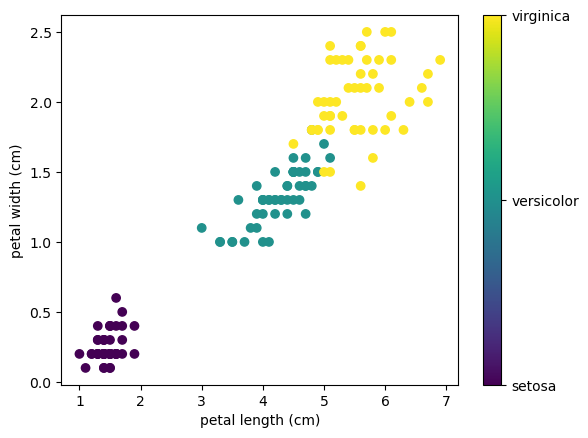

In [19]:
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

All the relations can be shown as a grid of 4x4 subplots in matplotlib

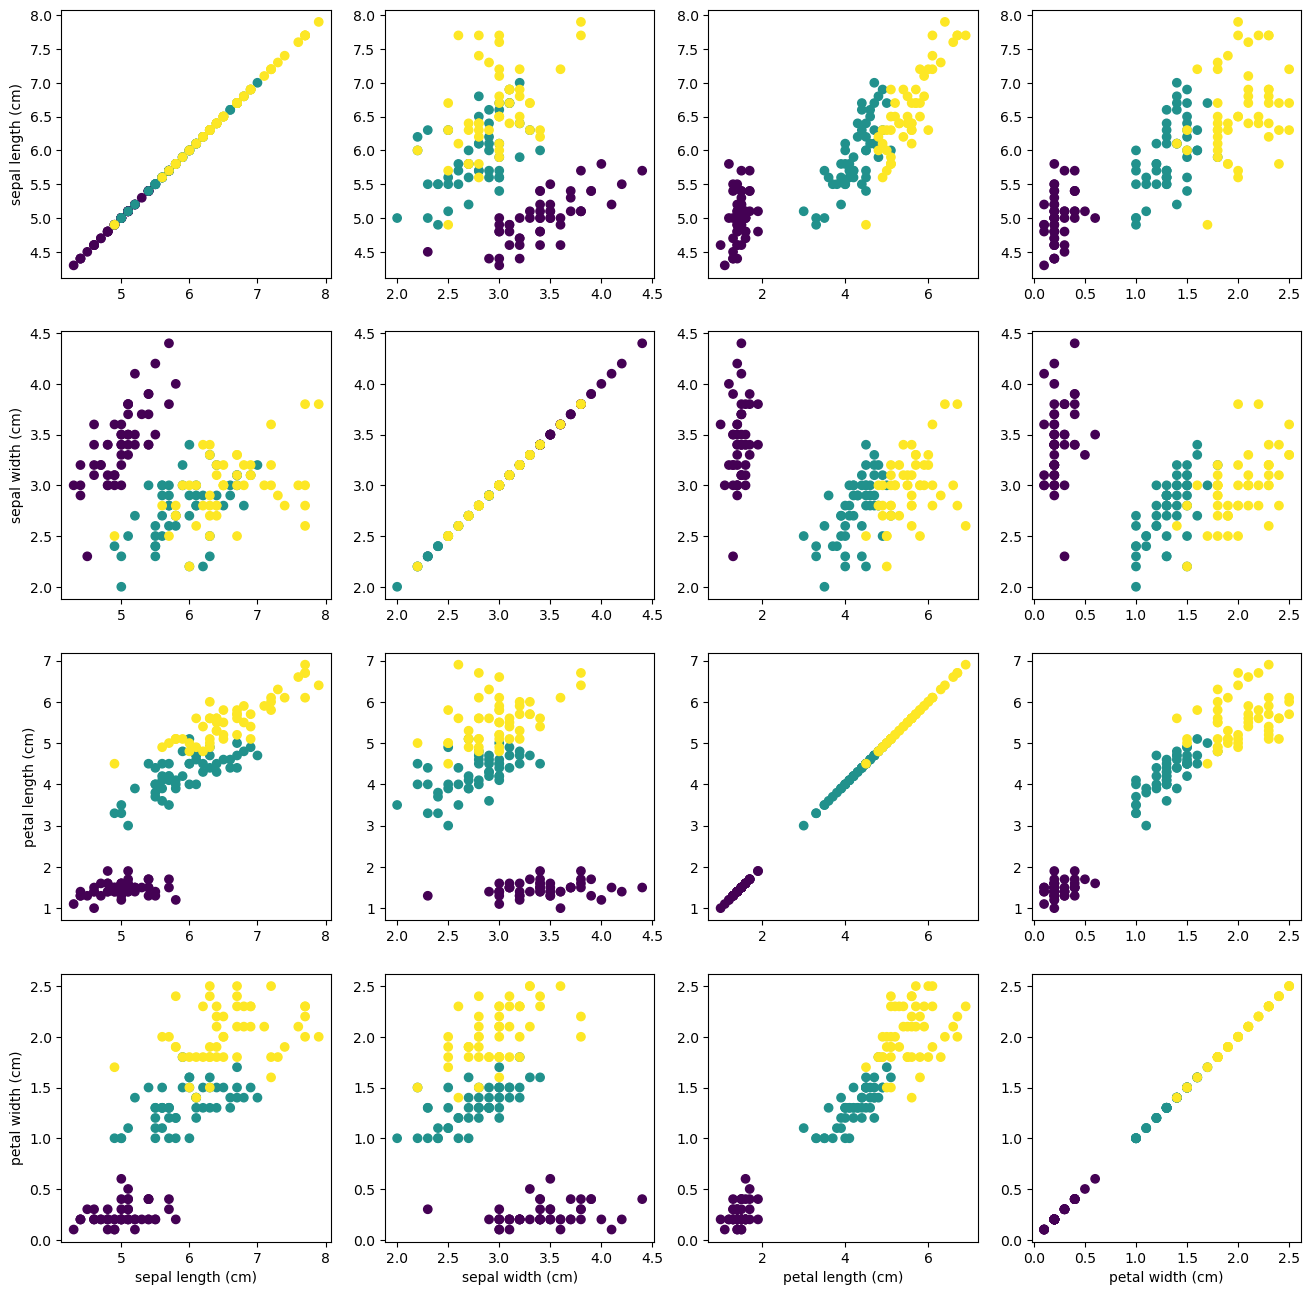

In [20]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
fig, axes=plt.subplots(nrows=4, ncols=4, figsize=(16,16))

for i in range(4):
    for j in range(4):
        axes[i,j].scatter(iris.data[:, j], iris.data[:, i], c=iris.target)
        if i==3: axes[i,j].set_xlabel(iris.feature_names[j])
        if j==0: axes[i,j].set_ylabel(iris.feature_names[i]);

#plt.colorbar(ticks=[0, 1, 2], format=formatter)

From the figure is clear that **setosa** variety is fairly separated from the **versicolor** and **virginica** and those two in turn are difficult to separate but for some features the distinction is clear.

<a id="classification_logistic"></a>
## Classification (Logistic Regression)

Logistic regression is a statistical method that is used to analyze datasets in which there are one or more independent variables that determine a binary outcome (True/False, 1/0). The goal of this methodology is to find the best fitting model to describe the relationship between the independent input variables and the dichotomous outcome. The probability distribution would have the form of an s-shape as:

$$
\log \left( \frac{p}{1-p} \right) = a + b_1 x_1 + b_2 x_2 \cdots
$$

where p is the probability of presence of the characteristic of interest, $x_1, x_2, \cdots$ are the independent input variables and $a, b_1, b_2, \cdots$ are the model fitted parameters. As here we want to optimize the probability distribution, we do not use the square error minimization but to maximize the likelihood of observing the sample values. This statistical process can be found in many different machine learning books or [Logistic Regression lecture](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf).



In [21]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int64)  # 1 if Iris-Virginica, else 0

**Note**: LogisticRegression implements several solvers such as “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”. “lbfgs” is used to converge faster on high-dimensional data. In reality, 4 dimensions are not really high-dimensional.

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

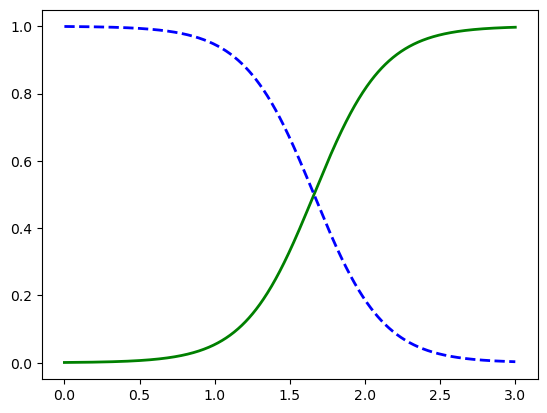

In [23]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

In [24]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

In [25]:
decision_boundary[0]

1.6606606606606606

We can add more to the plot to show how samples are classified under our logistic curve.

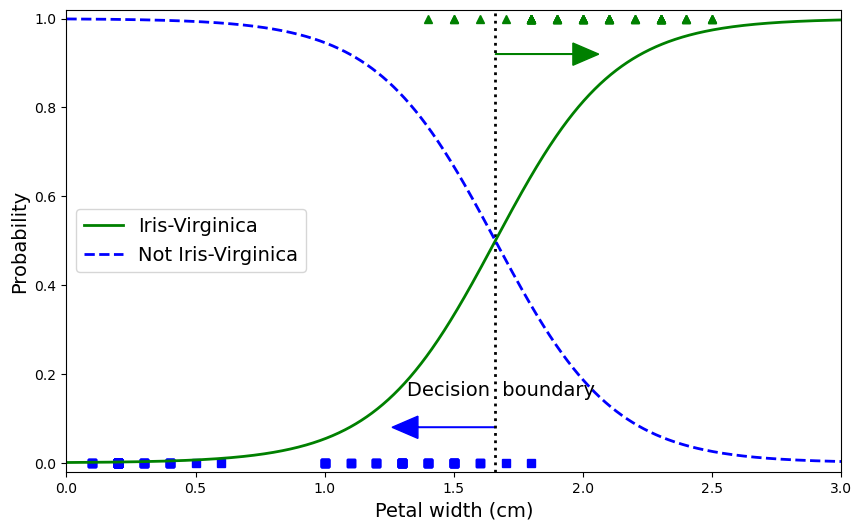

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02]);

In [27]:
decision_boundary

array([1.66066066])

In [28]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

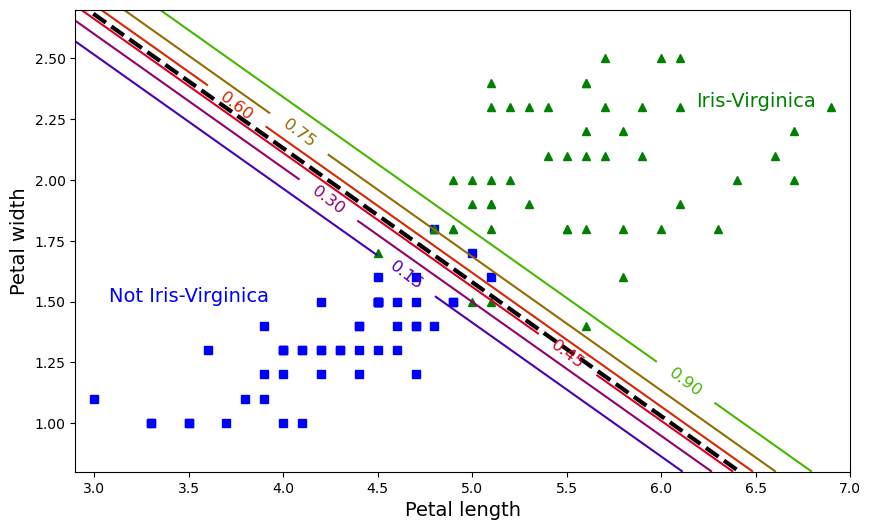

In [29]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int64)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7]);

In [30]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

(0.0, 7.0, 0.0, 3.5)

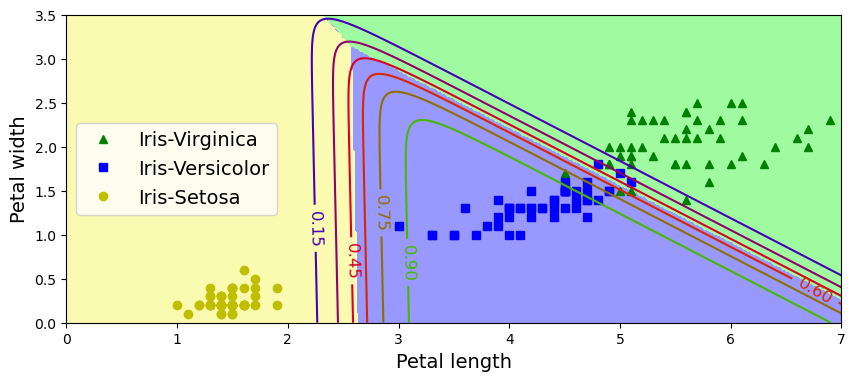

In [31]:
# logistic but 3 classes, where the largest is defined by the statistical analysis of occurrence
# of the training data
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])


In [32]:
softmax_reg.predict([[5, 2]])

array([2])

In [33]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

### The Scikit-learn estimator, transformations and pipelines

Every algorithm is exposed in scikit-learn via an ''Estimator'' object (initialization of the model). That means that you first prepare the object with some parameters and later you apply the `fit` method (in most cases) to process the data. After that predictions can be made. The process in SciKit is always the same: import the model, initialize the model, train or fit the model and use the model to predict.

For instance, consider a linear regression as it is implemented on the linear model of scikit-learn.

Sometimes we need to preprocess the data, for example, normalizing the values or introducing some shifts. When doing that we use in scikit-learn a **pipeline**.
A pipeline is a chain of transforms and estimators. In our case, we will scale the data before feeding the classifier.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [35]:
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

In [36]:
print (model)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

For example consider as five points in the $x$ domain and the function  $y=f(x)$ will include some small randomness

In [37]:
x = np.arange(10)
y = 0.9*np.arange(10)+ 1.5*(np.random.rand(10)-0.5)

Let's plot those points with a quick plot

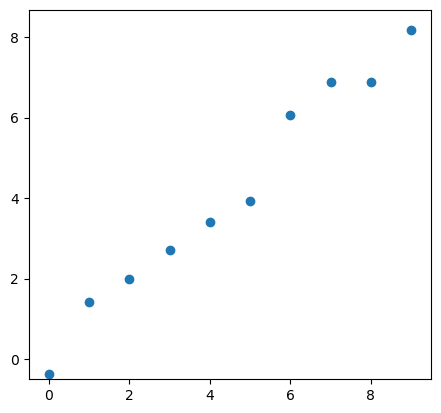

In [38]:
plt.plot(x, y, 'o')
plt.xlim(-0.5, np.max(x)+0.5)
plt.ylim(-0.5, np.max(y)+0.5);
plt.gca().set_aspect('equal')

scikit-learn needs the input data as a 2D array instead of a unidimensional array. The solution is to add a new axis to the original x array using `numpy.newaxis`

In [39]:
# The input data for sklearn is 2D: (samples == 3 x features == 1)
X = x[:, np.newaxis]
print (X)
print (y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[-0.37671497  1.40871468  1.99686635  2.72283009  3.40111595  3.9279086
  6.06392805  6.89265069  6.87888403  8.18072978]


In [40]:
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [41]:
model['linearregression'].coef_

array([2.61703468])

In [42]:
model['linearregression'].intercept_

0.009585966947328828

The model found a line with a slope $\approx 1.14$ and intercept $\approx 0.15$, slightly different from the slope $0.9$ and intercept $0.0$ if random numbers were not creating deviations in the data.

<a id="classification_knn"></a>
## Classification (K nearest neighbors)

K nearest neighbors (kNN) is one of the simplest non-parametric learning strategies that can be used for classification.

kNN is one of the simpler algorithms that stores all available cases and predicts the numerical target based on a similarity measure (e.g., distance functions which are based on a metric definition, where the Euclidean, Manhattan, or Minkowski are the most used ones). An important detail to keep in mine is that all features should be measured on the same scale. In case the scale is not the same, the scale should be standarized.

The algorithm can be summarized as follows: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [43]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print (iris.target_names[result])

['virginica']


Using this kNN we can create a map of all the different outcomes fixing the values of 3cm x 5cm sepal. Here we will use the linspace function from NumPy that return evenly spaced numbers over a specified interval.

In [44]:
N=100
preds = np.zeros((N,N))
x0 = 3
x1 = 5
minx2=np.min(iris.data[:,2])
maxx2=np.max(iris.data[:,2])
x2 = np.linspace(minx2, maxx2, N, endpoint=True)
minx3=np.min(iris.data[:,3])
maxx3=np.max(iris.data[:,3])
x3 = np.linspace(minx3, maxx3, N, endpoint=True)

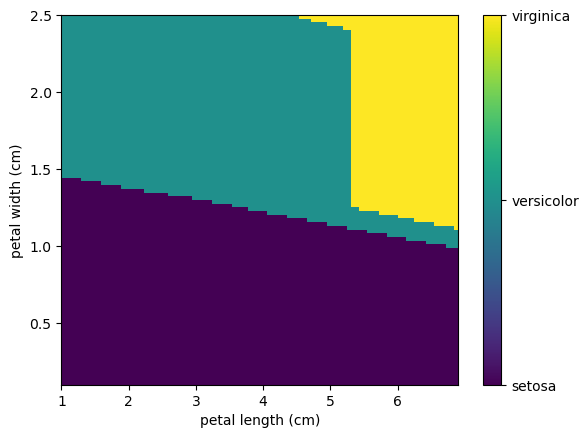

In [45]:
for i in range(N):
    for j in range(N):
        preds[i,j]=knn.predict([[x0, x1 , x2[i], x3[j]],])[0] # To prevent deprecation from new Numpy behavior

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.imshow(preds[::-1], extent=[minx2,maxx2, minx3, maxx3],aspect='auto')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);

<a id="classification_svm"></a>
## Classification (Support Vector Machines)

The goal of the support vector machine (SVM) algorithm is to find a hyperplane in an N-dimensional space(where N is the number of features) that distinctly classifies the data points.
This algorithm receives a given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimensional space this hyperplane is a line dividing a plane into two parts where each class lay on either side of the plane.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

In [46]:
from sklearn.svm import SVC

In [47]:
model = SVC(gamma='scale')
model.fit(X, y)
result = model.predict([[3, 5, 4, 2],])
print (iris.target_names[result])

['versicolor']


In [48]:
a=(5,)
a

(5,)

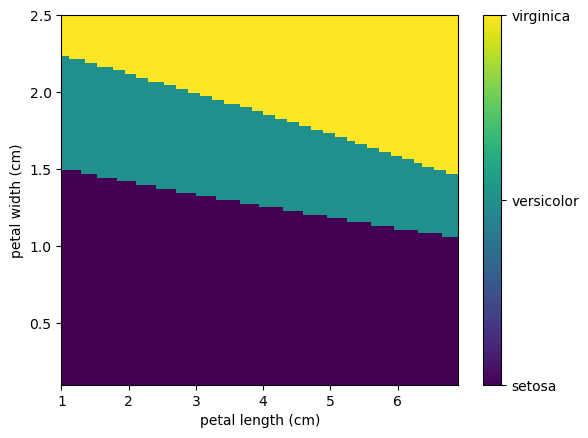

In [49]:
N=100
preds = np.zeros((N,N))
x0 = 3
x1 = 5
minx2=np.min(iris.data[:,2])
maxx2=np.max(iris.data[:,2])
x2 = np.linspace(minx2, maxx2, N, endpoint=True)
minx3=np.min(iris.data[:,3])
maxx3=np.max(iris.data[:,3])
x3 = np.linspace(minx3, maxx3, N, endpoint=True)

for i in range(N):
    for j in range(N):
        preds[i,j]=model.predict([[x0, x1 , x2[i], x3[j]],])[0] # The [0] prevents deprecation warnings on Numpy 1.25+

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.imshow(preds[::-1], extent=[minx2,maxx2,minx3,maxx3],aspect='auto')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);

#### Regression Example

Simplest possible regression is fitting a line to data:

Model coefficient: 3.93491, and intercept: 1.46229


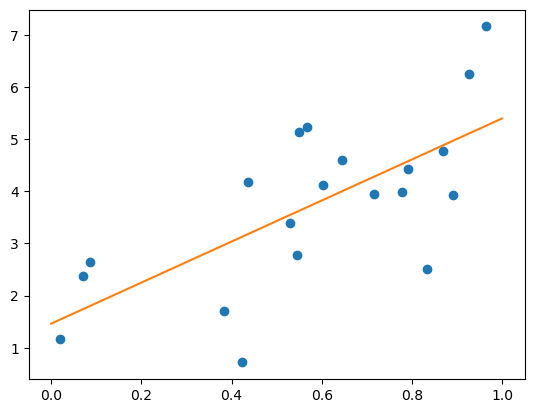

In [50]:
# Create some simple data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.normal(size=20)

# Fit a linear regression to it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print ("Model coefficient: %.5f, and intercept: %.5f"
       % (model.coef_, model.intercept_))

# Plot the data and the model prediction
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test);

<a id="classification_perceptrons"></a>
## Classification (Perceptrons)

The perceptron is an algorithm for learning a binary classifier called a **Linear classifier**, a function that maps its input $\mathbf{x}$ (a real-valued vector) to an output value $f(\mathbf{x})$ (a single binary value):

$$f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}$$

where $\mathbf{w}$ is a vector of real-valued *weights*, $\mathbf{w} \cdot \mathbf{x}$ is the dot product

$$\mathbf{w} \cdot \mathbf{x} = \sum_{i=1}^m w_i x_i$$,

where $m$ is the number of inputs to the perceptron, and $b$ is the *bias*.
The bias shifts the decision boundary away from the origin and does not depend on any input value.

The value of $f(\mathbf{x})$ (0 or 1) is used to classify $\mathbf{x}$ as either a positive or a negative instance, in the case of a binary classification problem. If {{mvar|b}} is negative, then the weighted combination of inputs must produce a positive value greater than $|b|$ to push the classifier neuron over the 0 thresholds. Spatially, the bias alters the position (though not the orientation) of the [[decision boundary]]. The perceptron learning algorithm does not terminate if the learning set is not [[linearly separable]]. If the vectors are not linearly separable learning will never reach a point where all vectors are classified properly. The most famous example of the perceptron's inability to solve problems with linearly nonseparable vectors is the Boolean [[exclusive-or]] problem.

In the context of neural networks, a perceptron is an **artificial neuron** using the **Heaviside step function** as the activation function. The perceptron algorithm is also termed the **single-layer perceptron**, to distinguish it from a **multilayer perceptron**, which is a misnomer for a more complicated neural network.  As a linear classifier, the single-layer perceptron is the simplest **feedforward neural network**.



In [51]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

Let's recreate the iris dataset and select two variables from it: petal length, petal width.

In [52]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int32)

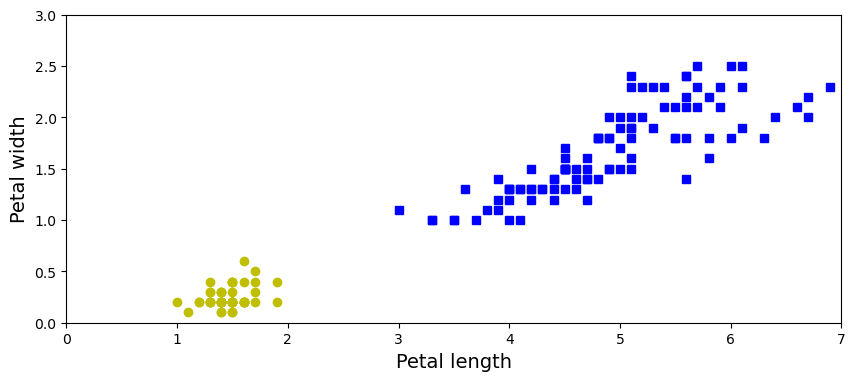

In [53]:
axes = [0, 7, 0, 3]
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14);
plt.axis(axes);

In [54]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # we set `max_iter` and `tol` explicitly to avoid
                                                               # warnings about the fact that their default value
                                                               # will change in future versions of Scikit-Learn.
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [55]:
y_pred

array([1], dtype=int32)

In [56]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

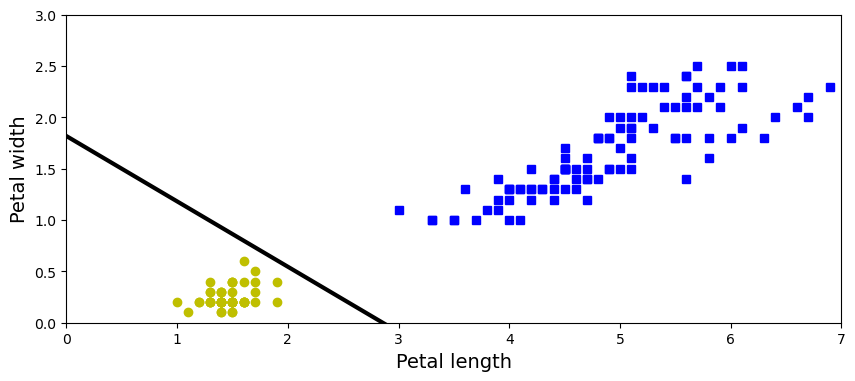

In [57]:
axes = [0, 7, 0, 3]
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14);
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
plt.axis(axes);

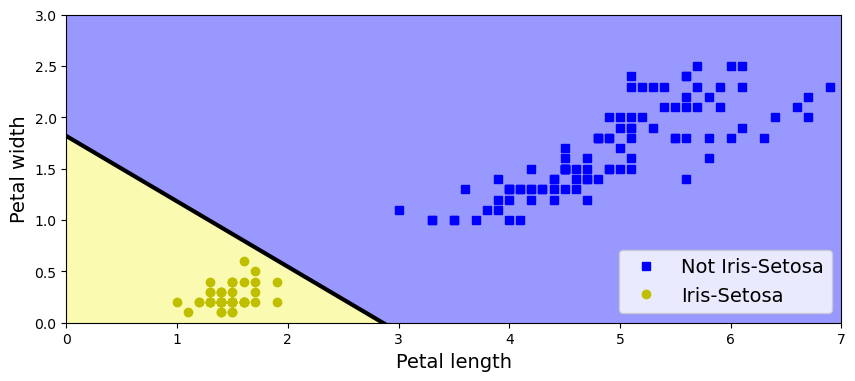

In [58]:
axes = [0, 7, 0, 3]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes);

<a id="pca"></a>
## Dimensionality Reduction (PCA)

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels,
and we are interested in finding a pattern or structure between the objects in question. In a sense,
you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can use unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we'll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize it in relation to other moving objects which have been seen.
- A given crystal structure, we can use to predict the stability.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

Principal Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance. This method is one of the most popular linear dimension reduction methodologies available in machine learning. Sometimes, it is used alone and sometimes as a starting solution for other dimension reduction methods. PCA is a projection-based method that transforms the data by projecting it onto a set of orthogonal axes.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


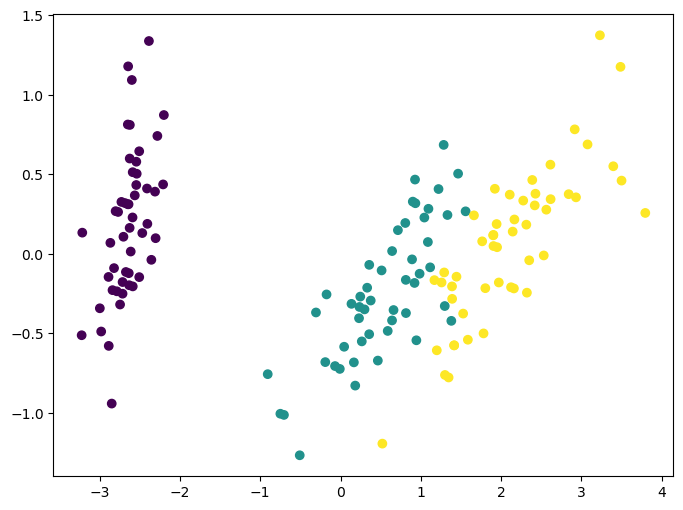

In [59]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print ("Reduced dataset shape:", X_reduced.shape)

fig,ax=plt.subplots(figsize=(8,6))

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

print ("Meaning of the 2 components:")
for component in pca.components_:
    print (" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

#### Clustering: K-means

K-means clustering is one of the simplest and most popular unsupervised machine learning algorithms by practicioners.
As discussed before, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labeled, outcomes.
AndreyBu, who has more than 5 years of machine learning experience and currently teaches people his skills, says that “the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”

The main idea with this algorithm is to group similar data into clusters and try to find the underlying developed pattern by looking at how the data clusters into a fixed number of (k) clusters in the dataset.

Note that these clusters will uncover relevant hidden structure of the data only if the criterion used highlights it.

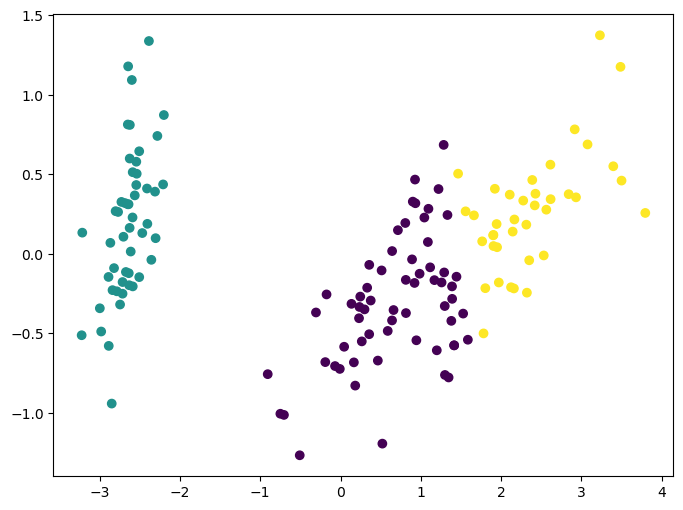

In [60]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

fig,ax=plt.subplots(figsize=(8,6))

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

### Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    This accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    This method, returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

<a id="other_datasets"></a>
## Other small datasets to explore

Scikit learn offers a collection of small datasets like iris for learning purposes. In addition to that, scikit also includes functions to download and prepare larger datasets. Finally, some datasets can be generated randomly under some models.

### Small datasets

These **small** datasets are packaged with the scikit-learn installation, and can be downloaded using the tools in ``sklearn.datasets.load_*``

In [61]:
[x for x in sklearn.datasets.__dict__.keys() if x[:5]=='load_']

['load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_wine',
 'load_svmlight_file',
 'load_svmlight_files']

### Dataset fetcher

These larger datasets are available for download (BE CAREFUL WITH THE CONNECTION!), and scikit-learn includes tools that streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``

In [62]:
[x for x in sklearn.datasets.__dict__.keys() if x[:6]=='fetch_']

['fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized']

### Modeled datasets

Finally, there are several datasets that are generated from models based on a random seed.  These are available in the ``sklearn.datasets.make_*``

In [63]:
[x for x in sklearn.datasets.__dict__.keys() if x[:5]=='make_']

['make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll']

<a id="digits"></a>
# Handwritten Digits Data Set: Validation and Model Selection

This section focuses on **validation** and **model selection**.

<a id="dataset"></a>
## The small 8x8 dataset

Features can be any **uniformly measured** numerical observation of the data. For example, in the digits data, the features are the brightness of each pixel:

In [64]:
digits = sklearn.datasets.load_digits()
digits.data.shape

(1797, 64)

In [65]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [66]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

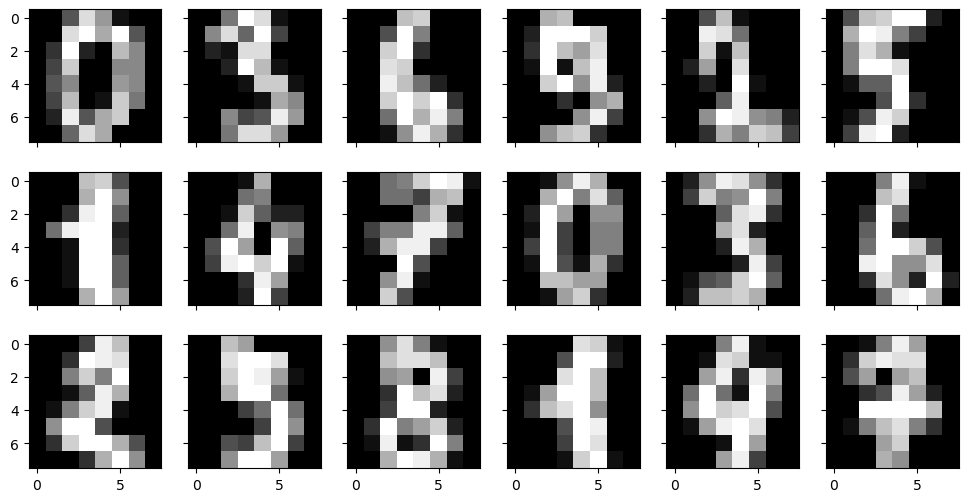

In [67]:
N=3
M=6
fig, axs = plt.subplots(N,M,sharex=True, sharey=True, figsize=(12,6))
for i in range(N):
    for j in range(M):
        axs[i,j].imshow(digits['images'][N*j+i], cmap='gray')

<a id="naive_bayes"></a>
## Gaussian Naive Bayes Estimator

Let's show a quick classification example, using the simple-and-fast Gaussian Naive Bayes estimator. Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ Theorem provides a mathematical procedure where we can calculate the probability of a hypothesis given our prior knowledge. This can be described by this equation

$$
P[h|d] = \frac{P[d|h] P[h]}{P[d]}
$$
where $P$ is a probability distribution function, $d$ is the historic data and $h$ is the tested hypothesis. Therefore, this equation can be read as follows: the conditional probability (posterior) of a given hypothesis occurs provided the data $d$ can be obtained as the fraction between the product of the probability that the data $d$ occurs given that $h$ is true with the probability of the hypothesis divided by the probability of the data.

Now, the posterior probability can be obtained from several different hypotheses. Based on this, the maximum probable hypothesis (MAP: maximum probably hypothesis) can be calculated and  
After calculating the posterior probability for several different hypotheses, you can select the hypothesis with the highest probability. This is the maximum probable hypothesis and may formally be called the maximum a posteriori (MAP) hypothesis. How we account for the different probability terms gives rise to different methods.

In the so-called naive Bayes, the probabilities for each hypothesis are simplified, such that the calculation becomes easier. This approximation will say that the data realization to obtain $P[d|h]$ is independent, which means that
$P[d|h] =  P[d_1|h] P[d_2|h] P[d_3|h] \cdots$.

Now, the method reduces to the following. By entering a set of classified data (training), we can use it to obtain the probabilities of each class and the conditional probabilities of each input value given to each class. This last probability is obtained directly from the training data as the frequency of each feature in a given class is divided by the frequency of instances of that class value.

A very simple case is observed as follows:


In [68]:
from sklearn.naive_bayes import GaussianNB
X = digits.data
y = digits.target

# Instantiate the estimator
clf = GaussianNB()

# Fit the estimator to the data, leaving out the last five samples
clf.fit(X[:-5], y[:-5])

# Use the model to predict the last several labels
y_pred = clf.predict(X[-5:])

print (y_pred)
print (y[-5:])

[9 0 8 9 8]
[9 0 8 9 8]


We see that this relatively simple model leads to a perfect classification of the last few digits!

Let's use the model to predict labels for the full dataset, and plot the **confusion matrix**, which is a convenient visual representation of how well the classifier performs.

By definition a confusion matrix $C$ is such that $C_{i, j}$ is equal to the number of observations known to be in $i$ but predicted to be in the group $j$

classification accuracy: 0.8580968280467446


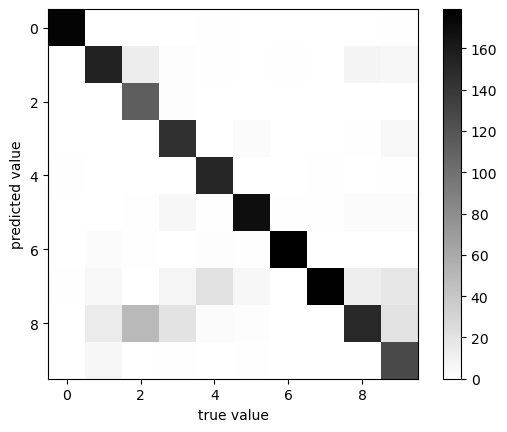

In [69]:
from sklearn import metrics

clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X)

def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred),
               cmap=plt.cm.binary, interpolation='none')
    plt.colorbar()
    plt.xlabel('true value')
    plt.ylabel('predicted value')

print ("classification accuracy:", metrics.accuracy_score(y, y_pred))
plot_confusion_matrix(y, y_pred)

Interestingly, there is confusion between some values.  In particular, the number **2** is often mistaken for the number **8** by this model!  But for the vast majority of digits, we can see that the classification looks correct.

Let's use the ``metrics`` submodule again to print the accuracy of the classification:

In [70]:
print (metrics.accuracy_score(y, y_pred))

0.8580968280467446


We have an 82% accuracy rate with this particular model.

But there's a problem: we are testing the model on the data we used to train the model. As we'll see later, this is generally not a good approach to model validation!  Because of the nature of the Naive Bayes estimator, it's alright in this case, but we'll see later examples where this approach causes problems.

<a id="model_validation"></a>
## Model Validation

An important piece of the learning task is the measurement of prediction performance, also known as **model validation**.  We'll go into detail about this, but first, motivate the approach with an example.

### The Importance of Splitting
Above we looked at a *confusion matrix*, which can be computed based on the results of any model. Let's look at another classification scheme here, the *K-Neighbors Classifier*

classification accuracy: 1.0


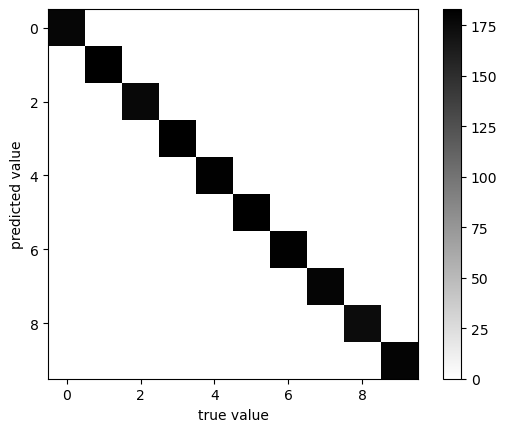

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

digits = datasets.load_digits()
X, y = digits.data, digits.target

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)

print ("classification accuracy:", metrics.accuracy_score(y, y_pred))
plot_confusion_matrix(y, y_pred)

Our classifier gives perfect results!  Have we settled on a perfect classification scheme?

**No!**  The *K*-neighbors classifier is an example of an instance-based classifier, which memorizes the input data and compares any unknown sample to it.  To accurately measure the performance, we need to use a separate *validation set*, which the model has not yet seen.

Scikit-learn contains utilities to split data into a training and validation set:

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, X_test.shape)

(1257, 64) (540, 64)


classification accuracy: 0.9833333333333333


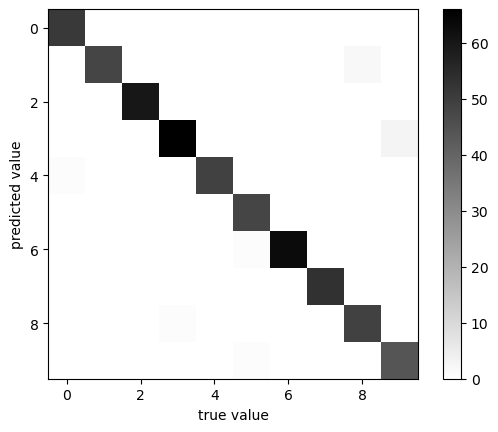

In [73]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("classification accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

This gives us a more accurate indication of how well the model is performing.

For this reason, you should **always do a train/test split** when validating a model.

### Exploring Validation Metrics

Above, we used perhaps the most simple evaluation metric, the number of matches and mismatches.  But this is not always sufficient.  For example, imagine you have a situation where you'd like to identify a rare class of event from within a large number of background sources.

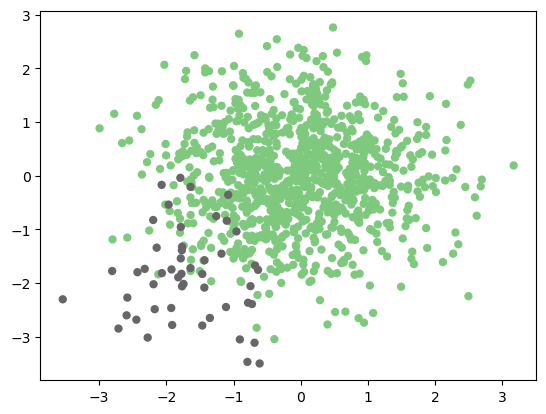

In [74]:
# Generate an un-balanced 2D dataset
np.random.seed(0)
X = np.vstack([np.random.normal(0, 1, (950, 2)),
               np.random.normal(-1.8, 0.8, (50, 2))])
y = np.hstack([np.zeros(950), np.ones(50)])

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='none',
            cmap=plt.cm.Accent);

### Exploring other Validation Scores

Until now we are using only the **accuracy** to evaluate our algorithms. We can calculate other scores such as the **precision**, the **recall**, and the **f1 score**:

In [75]:
from sklearn import metrics
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(kernel='linear').fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("accuracy:", metrics.accuracy_score(y_test, y_pred))
print ("precision:", metrics.precision_score(y_test, y_pred))
print ("recall:", metrics.recall_score(y_test, y_pred))
print ("f1 score:", metrics.f1_score(y_test, y_pred))

accuracy: 0.972
precision: 0.8
recall: 0.75
f1 score: 0.7741935483870969


#### What do these mean?

These are ways of taking into account not just the classification results, but the results **relative to the true category**.

 $$ {\rm accuracy} \equiv \frac{\rm correct~labels}{\rm total~samples} $$

---

 $$ {\rm precision} \equiv \frac{\rm true~positives}{\rm true~positives + false~positives} $$

---

 $$ {\rm recall} \equiv \frac{\rm true~positives}{\rm true~positives + false~negatives} $$

---

 $$ F_1 \equiv 2 \frac{\rm precision \cdot recall}{\rm precision + recall} $$

The **accuracy**, **precision**, **recall**, and **f1-score** all range from 0 to 1, with 1 being optimal.
Here we've used the following definitions:

- *True Positives* are those which are labeled ``1`` which are actually ``1``
- *False Positives* are those which are labeled ``1`` which are actually ``0``
- *True Negatives* are those which are labeled ``0`` which are actually ``0``
- *False Negatives* are those which are labeled ``0`` which are actually ``1``


We can quickly compute a summary of these statistics using scikit-learn's provided convenience function:

In [76]:
print (metrics.classification_report(y_test, y_pred,
                                    target_names=['background', 'foreground']))

              precision    recall  f1-score   support

  background       0.98      0.99      0.99       234
  foreground       0.80      0.75      0.77        16

    accuracy                           0.97       250
   macro avg       0.89      0.87      0.88       250
weighted avg       0.97      0.97      0.97       250



This tells us that, though the overall correct classification rate is 97%, we only correctly identify 67% of the desired samples, and those that we label as positives are only 83% correct!  This is why you should make sure to carefully choose your metric when validating a model.

<a id="cross_validation"></a>
## Cross-Validation

Using the simple train/test split as above can be useful, but there is a disadvantage: **You're ignoring a portion of your dataset**.  One way to address this is to use cross-validation.

The simplest cross-validation scheme involves running two trials, where you split the data into two parts, first training on one, then training on the other:

In [77]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5)
print (X1.shape)
print (X2.shape)

(500, 2)
(500, 2)


In [78]:
y2_pred = SVC(kernel='linear').fit(X1, y1).predict(X2)
y1_pred = SVC(kernel='linear').fit(X2, y2).predict(X1)

print (np.mean([metrics.precision_score(y1, y1_pred),
               metrics.precision_score(y2, y2_pred)]))

0.7467320261437909


This is known as **two-fold** cross-validation, and is a special case of *K*-fold cross validation.

Because it's such a common routine, scikit-learn has a K-fold cross-validation scheme built-in:

In [79]:
from sklearn.model_selection import cross_val_score

# Let's do a 2-fold cross-validation of the SVC estimator
print (cross_val_score(SVC(kernel='linear'), X, y, cv=2, scoring='precision'))

[0.75       0.84210526]


It's also possible to use ``sklearn.cross_validation.KFold`` and ``sklearn.cross_validation.StratifiedKFold`` directly, as well as other cross-validation models which you can find in the ``cross_validation`` module.

Example: The ``SVC`` classifier takes a parameter ``C`` whose default value is ``1``.  Using 5-fold cross-validation, make a plot of the precision as a function of ``C``, for the ``SVC`` estimator on this dataset.  For best results, use a logarithmic spacing of ``C`` between 0.1 and 100.

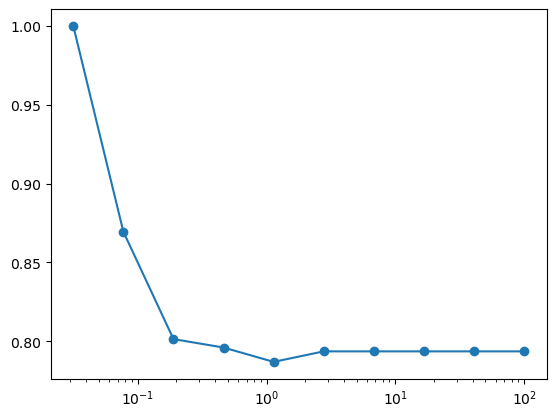

In [80]:
Cs = np.logspace(-1.5, 2, 10)
scores = []

for C in Cs:
    score = cross_val_score(SVC(kernel='linear', C=C), X, y, cv=5, scoring='precision')
    scores.append(score.mean())

plt.semilogx(Cs, scores, 'o-');

## Grid Search

The previous exercise is an example of a **grid search** for model evaluation.  Again, because this is such a common task, Scikit-learn has a grid search tool built-in, which is used as follows.  Note that ``GridSearchCV`` has a ``fit`` method: it is a meta-estimator: an estimator over estimators!

In [81]:
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel='linear')
Crange = np.logspace(-1.5, 2, 10)

grid = GridSearchCV(clf, param_grid={'C': Crange},
                    scoring='precision', cv=5)
grid.fit(X, y)

print ("best parameter choice:", grid.best_params_)

best parameter choice: {'C': 0.03162277660168379}


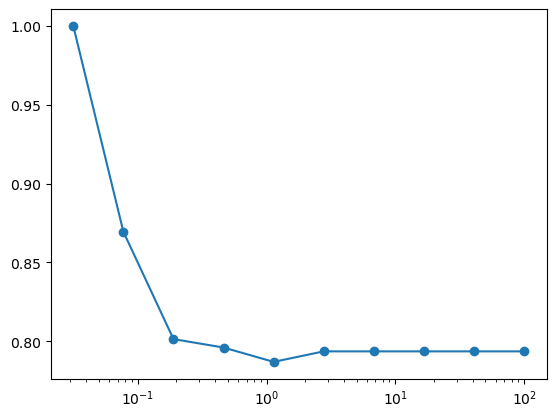

In [82]:
scores = [g for g in grid.cv_results_['mean_test_score']]
plt.semilogx(Crange, scores, 'o-');

Grid search can come in very handy when you're tuning a model for a particular task.

---

# Acknowledgments

This notebook is based on a variety of sources, usually other notebooks, the material was adapted to the topics covered during lessons. In some cases, the original notebooks were created for Python 2.x or older versions of Scikit-learn or Tensorflow and they have to be adapted to at least Python 3.7.

We acknowledge the support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/NSF.jpg?raw=1" alt="National Science Foundation" style="width:50%" align="left" height="100" width="100">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/DOE.jpg?raw=1" alt="National Science Foundation" style="width:50%" align="right" height="100" width="100">
</div>

---

# References

The snippets above are meant only to give a brief introduction to some of the most popular techniques in machine learning so you can decide whether this kind of analysis might be useful in your research. If it seems like machine learning will be important in your work, you may want to check out some of the resources listed below (arranged roughly from least to most technical):

This list is by no means an exhaustive list of books and resources. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Machine Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Hands-On Machine Learning  with Scikit-Learn and TensorFlow"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Hands-On%20Machine%20Learning%20%20with%20Scikit-Learn%20and%20TensorFlow.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Hands-On Machine Learning  with Scikit-Learn and TensorFlow (First Edition [There is a second edition])<br>
      Auréleien Géron<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Python Machine Learning - Raschka"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Python%20Machine%20Learning%20-%20Raschka.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Machine Learning, a Probabilistic Perspective<br>
      Sebastian Raschka and Vahid Mirjalili<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Foundations of Machine Learning - Mohri"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Foundations%20of%20Machine%20Learning%20-%20Mohri.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Foundations of Machine Learning (Second Edition)<br>
      Mehryar Mohri, Afshin Rostamizadeh and Ameet Talwalkar<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Machine Learning - Alpaydin"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Introduction%20to%20Machine%20Learning%20-%20Alpaydin.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Machine Learning (Fourth Edition)<br>
      Ethem Alpaydin<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Machine Learning, a Probabilistic Perspective - Murphy"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Machine%20Learning,%20a%20Probabilistic%20Perspective%20-%20Murphy.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Machine Learning, a Probabilistic Perspective<br>
      Kevin P. Murphy<br>
      2012<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Elements of Statistical Learning - Hastie"
       src="https://github.com/romerogroup/Notebooks_4SIAH/blob/main/Machine_Learning/fig/books/Elements%20of%20Statistical%20Learning%20-%20Hastie.jpg?raw=1"
       height="160" width="120"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      <a href="https://hastie.su.domains/Papers/ESLII.pdf">Elements of Statistical Learning</a><br>
      Trevor Hastie, Robert Tibshirani, and Jerome Friedman<br>
      2008<br>
  </div>
</div>


### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)

 * Aurelien Geron Hands-on Machine Learning with Scikit-learn
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)


 * [A Friendly Introduction to Machine Learning](https://www.youtube.com/watch?v=IpGxLWOIZy4)

In this 30-minute video, Luis Serrano (head of machine learning at Udacity) offers intuitive, user-friendly introductions to the mechanics that drive several machine learning models, including Naive Bayes, Decision Tree, Logistic Regression, Neural Network, and Support Vector Machine classifiers. This video is a great place to start for those looking for quick intuitions about the ways these algorithms work.

 * [Hands-On Machine Learning with Scikit-Learn and TensorFlow (OREILLY)](http://shop.oreilly.com/product/0636920052289.do)

This OREILLY book offers a great high-level introduction to machine learning with Python. Aurélien Géron guides readers through ways one can use scikit-learn and other popular libraries to build machine learning models in Python. This is a great choice for those who just want to get work done, without necessarily unlocking the insights that would allow one to build models from scratch.

 * [Machine Learning Cheatsheets](https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463)

This collection of "cheat sheets" gives concise overviews of the API's and models behind many of the most prominent packages and concepts in machine learning and its allied fields, including different neural network architectures, numerical optimization techniques, algorithms appropriate for different tasks, scikit-learn, pandas, scikit-learn, scipy, ggpot2, dplyr and tidyr, big O notation, and several other topics. Recently identified as the "most popular" article on machine learning in Medium.

 * [Mining of Massive Datasets](http://www.mmds.org/)

This Stanford University course and digital publication offer introductions to a wide array of subtopics in machine learning. The authors focus on helping readers gain an intuitive understanding of how machine learning models work. One of the most lucid and concise treatments of machine learning available on the web.

 * [Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)

This Stanford University course offers a spectacular introduction to Convolutional Neural Networks, the cornerstone of modern machine learning in the domain of computer vision. If your work involves images or video materials, and you'd like to apply machine learning techniques to your data, this course will help you get up and running with state-of-the-art techniques in convnets.

 * [Machine Learning (Andrew Ng, Coursera)](https://www.coursera.org/learn/machine-learning)

Andrew Ng's Coursera course on machine learning will help you master many of the fundamentals involved in modern machine learning. Professor Ng will guide you through a great deal of the math involved in contemporary machine learning, starting with simple linear classifiers and building up into complex neural network architectures. This class is ideal for those who like to understand the math behind the models they use.

 ---

# Back of the Book

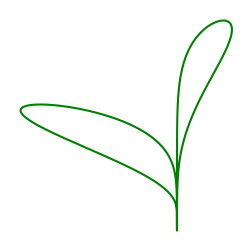

In [83]:
plt.figure(figsize=(3,3))
n = chapter_number
maxt=(2*(n-1)+3)*np.pi/2
t = np.linspace(np.pi/2, maxt, 1000)
tt= 1.0/(t+0.01)
x = (maxt-t)*np.cos(t)**3
y = t*np.sqrt(np.abs(np.cos(t))) + np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [84]:
end = time.time()
print(f'Chapter {chapter_number} run in {int(end - start):d} seconds')

Chapter 2 run in 31 seconds
